# by Abhishek Thakur

# Cross-validation

how to choose the best cross-validation depending on your datasets.?

cross-validation is a step in the process of building a machine learning model which helps us ensure that our models fit the data accurately and also ensures that we do not overfit

In [1]:
import pandas as pd
df = pd.read_csv("winequality-red.csv")

In [2]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


We can treat this problem either as a classification problem or as a regression problem since wine quality is nothing but a real number between 0 and 10.
<br>
For simplicity, let’s choose classification.

This dataset, however, consists of only six types of quality values. We will thus map all quality values from 0 to 5.

In [3]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

you can use the map function of pandas with any dictionary to convert the values in a given column to values in the dictionary

In [4]:
df.loc[:,'quality'] = df['quality'].map(quality_mapping)

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


When we look at this data and consider it a classification problem, a lot of algorithms come to our mind that we can apply to it, probably, we can use neural networks. But it would be a bit of a stretch if we dive into neural networks from the beginning. So, let’s start with something simple that we can visualize too: **decision trees.**

We keep 1000 samples for training and 599 as a separate set.

In [6]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected 
#for training
df_train = df.head(1000)

# bottom 599 values are selected 
# for testing/validation
df_test = df.tail(599)

In [7]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics

# initialize decision tree classifier class
# with max depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity',
       'volatile acidity',
       'citric acid',
       'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
       ]

In [8]:
# train the model on the provided model
# and mapped quality from before
clf.fit(df_train[cols], df_train['quality'])

DecisionTreeClassifier(max_depth=3)

Now, we test the accuracy of this model on the training set and the test set:

In [9]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions on
# training data set
tarin_accuracy = metrics.accuracy_score(
    df_train['quality'],train_predictions
)

# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
    df_test['quality'],test_predictions
)

In [10]:
tarin_accuracy

0.6

In [11]:
test_accuracy

0.5525876460767947

Here, we have used accuracy, mainly because it is the most straightforward metric. It might not be the best metric for this problem. What about we calculate these accuracies for different values of max_depth and make a plot?

In [12]:
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics

# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline

# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1,25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # columns/features for training
    # note that, this can be done outside
    # the loop
    cols = [
        'fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
    ]
    
    # fit the model on given features
    clf.fit(df_train[cols], df_train['quality'])
    
    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
        df_train['quality'], train_predictions
    )
    
    test_accuracy = metrics.accuracy_score(
        df_test['quality'], test_predictions
    )
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)        

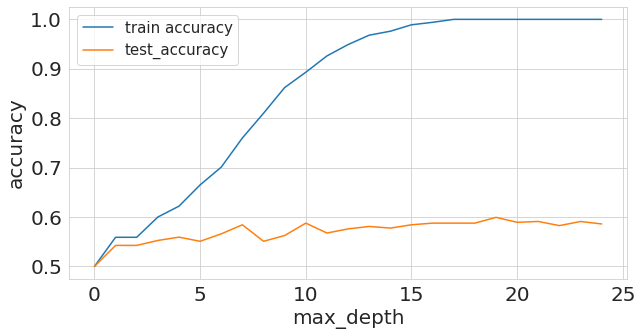

In [13]:
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_accuracies, label='train accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend(loc='upper left', prop={'size': 15})
plt.xticks(range(0,26,5))
plt.xlabel('max_depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()


We see that the best score for test data is obtained when max_depth has a value of 14.

As we keep increasing the value of this parameter, test accuracy remains the same or gets worse, but the training accuracy keeps increasing. It means that our simple decision tree model keeps learning about the training data better and better with an increase in max_depth, but the performance on test data does not improve at all.
<br>
This is called overfitting.

The model fits perfectly on the training set and performs poorly when it comes to
the test set. This means that the model will learn the training data well but will not
generalize on unseen samples. In the dataset above, one can build a model with very
high max_depth which will have outstanding results on training data, but that kind
of model is not useful as it will not provide a similar result on the real-world samples
or live data.

One might argue that this approach isn’t overfitting as the accuracy of the test set
more or less remains the same. **Another definition of overfitting would be when the
test loss increases as we keep improving training loss.** This is very common when
it comes to neural networks.

If the model's prediction is perfect, the **loss** is zero; otherwise, the loss is greater.

Whenever we train a neural network, we must monitor loss during the training time
for both training and test set. If we have a very large network for a dataset which is
quite small (i.e. very less number of samples), we will observe that the loss for both
training and test set will decrease as we keep training. However, at some point, test
loss will reach its minima, and after that, it will start increasing even though training
loss decreases further. We must stop training where the validation loss reaches its
minimum value.

**Now we can go back to cross-validation.**

While explaining about overfitting, I decided to divide the data into two parts. I
trained the model on one part and checked its performance on the other part. Well,
this is also a kind of cross-validation commonly known as a **hold-out set.**

There are many different ways one can do cross-validation, and it is the most critical
step when it comes to building a good machine learning model which is
generalizable when it comes to unseen data.
<br>
**Choosing the right cross-validation**
depends on the dataset you are dealing with

**some of the most used cross-validation techniques**
<br>
• k-fold cross-validation
<br>
• stratified k-fold cross-validation
<br>
• hold-out based validation
<br>
• leave-one-out cross-validation
<br>
• group k-fold cross-validation

We can divide the data into k different sets which are exclusive of each other. This
is known as **k-fold cross-validation.**

We can split any data into k-equal parts using KFold from scikit-learn. Each sample
is assigned a value from 0 to k-1 when using k-fold cross validation.

In [14]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection

if __name__ == '__main__':
    # Training data is in a CSV file called train.csv
    df = pd.read_csv('winequality-red.csv')
    
    # we create a new column called kfold and fill it with -1
    df['kfold'] = -1
    
    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
    
    # initiate the kfold class from model_selection module
    kf = model_selection.KFold(n_splits=5)
    
    # fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] = fold
        
    # save the new csv with kfold column
    df.to_csv('winequality-red_n_folds.csv', index=False)

If you have a
skewed dataset for binary classification with 90% positive samples and only 10%
negative samples,In these cases, we prefer using **stratified k-fold cross-validation.**
Stratified k-fold cross-validation keeps the ratio of labels in each fold constant.
<br>
**we specify the
target column on which we want to stratify**

In [15]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection

if __name__ == '__main__':
    # Training data is in a CSV file called train.csv
    df = pd.read_csv('winequality-red.csv')
    
    # we create a new column called kfold and fill it with -1
    df['kfold'] = -1
    
    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
    
    # fetch targets
    y = df['quality'].values
    
    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill the new kfold column
    for fold, (t_, val_) in enumerate(kf.split(X=df, y=y)):
        df.loc[val_, 'kfold'] = fold
        
    # save the new csv with kfold column
    df.to_csv('winequality-red_StratifieldKFold.csv', index=False)

The rule is simple. If it’s a standard classification problem, choose stratified k-fold
blindly.

But what should we do if we have a large amount of data? Suppose we have 1
million samples. A 5 fold cross-validation would mean training on 800k samples
and validating on 200k. Depending on which algorithm we choose, training and
even validation can be very expensive for a dataset which is of this size. In these
cases, we can opt for a **hold-out based validation.**

The process for creating the hold-out remains the same as stratified k-fold, but For a
dataset which has 1 million samples,we will have 100k samples in the holdout,
and we will always calculate loss, accuracy and other metrics on this set and
train on 900k samples.

Hold-out is also used very frequently with **time-series data**.

Now we can move to regression. The good thing about regression problems is that
we can use all the cross-validation techniques mentioned above for regression
problems except for stratified k-fold.

To use **stratified k-fold for a regression** problem, we have first to divide the target
into bins, and then we can use stratified k-fold in the same way as for classification
problems.

you can use a simple rule like **Sturge’s Rule** to calculate the appropriate
number of bins.
<br>
Number of Bins = 1 + log2(N)
<br>
example : num_bins = int(np.floor(1 + np.log2(len(data))))

In [16]:
# stratified-kfold for regression
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
    # we create a new column called kfold and fill it with -1
    data["kfold"] = -1
    
    # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
    
    # calculate the number of bins by Sturge's rule
    # I take the floor of the value, you can also
    # just round it
    num_bins = int(np.floor(1 + np.log2(len(data))))
    
    # bin targets
    data.loc[:, "bins"] = pd.cut(
        data["target"], bins=num_bins, labels=False
    )
    
    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill the new kfold column
    # note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
        
    # drop the bins column
    data = data.drop("bins", axis=1)    
    # return dataframe with folds
    return data

if __name__ == "__main__":
    # we create a sample dataset with 15000 samples
    # and 100 features and 1 target
    X, y = datasets.make_regression(
        n_samples=15000, n_features=100, n_targets=1
    )
    
    # create a dataframe out of our numpy arrays
    df = pd.DataFrame(
        X,
        columns=[f"f_{i}" for i in range(X.shape[1])]
    )
    df.loc[:, "target"] = y
    
    # create folds
    df = create_folds(df)

Cross-validation is the first and most essential step when it comes to building
machine learning models.

The types of cross-validation presented in this chapter can be applied to almost any
machine learning problem. Still, you must keep in mind that cross-validation also
depends a lot on the data and you might need to adopt new forms of cross-validation
depending on your problem and data.